### 1. 二次回归和线性回归的拟合效果的对比

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.font_manager import FontProperties

# 设置显示的中文字题为宋体
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=20)

#### 1.1 定义训练集数据和测试集数据

In [38]:
#训练集和测试集数据
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[7], [9], [11], [15]]
y_test = [[8], [12], [15], [18]]

#### 1.2 定义绘图函数
- plt.axis([xmin, xmax, ymin, ymax])

In [39]:
def draw_plt():
    # 定义 figure
    plt.figure()
    # 设置 title 和 label
    plt.title(label=u'披萨的价格和直径', fontproperties=font_set)
    plt.xlabel(u'直径(inch)', fontproperties=font_set)
    plt.ylabel(u'价格(美元)', fontproperties=font_set)
    plt.axis([0, 25, 0, 25])
    # 开启网格
    plt.grid(True)
    return plt

#### 1.3 画出纵横坐标以及散点图

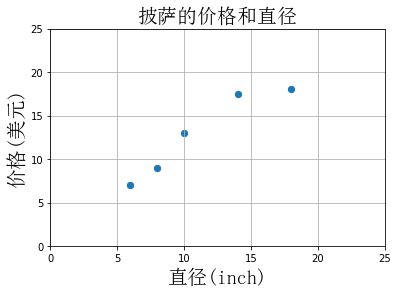

In [40]:
plt_obj = draw_plt()
# s = 40, 是指点的大小
# 绘制训练数据的散点图
plt_obj.scatter(X_train, y_train, s=40)

#### 1.4 绘制线性回归曲线

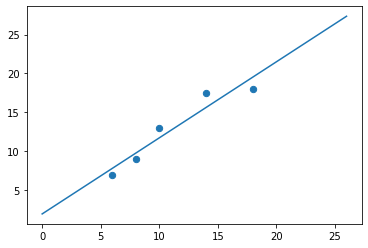

In [41]:
xx = np.linspace(start=0, stop=26, num=100)
# 将数据转换成 (100,1)的矩阵
xx = xx.reshape(xx.shape[0], 1)

# 定义线性回归的模型
regressor = LinearRegression()
# 训练数据
regressor.fit(X_train, y_train)
# 预测
# shape (n_samples, n_features)
yy = regressor.predict(xx)
plt_obj.scatter(X_train, y_train, s=40)
# 绘制线性回归的预测结果曲线
plt.plot(xx, yy, label="linear equation")

#### 1.5 生成多项式特征

- 本次以二次回归为例

In [42]:
# 创建多项式特征对象
poly_feature = PolynomialFeatures(degree=2)
# 将训练数据转换为多项式特征
X_train_poly = poly_feature.fit_transform(X_train)

# 使用线性回归模型对多项式特征进行训练
regressor_poly = LinearRegression()
regressor_poly.fit(X_train_poly, y_train)

LinearRegression()

#### 1.6 生成预测数据
- np.linspace(start, stop, num)

In [43]:
xx_poly = np.linspace(0, 26, 100)
# 将数据转换为 (100,1) 的矩阵
xx_poly = xx_poly.reshape(xx.shape[0], 1)
print("xx_poly.shape : " , xx_poly.shape)
# 将数据转换为多项式特征
xx_poly_feature = poly_feature.fit_transform(xx_poly)
# 多特征值进行预测
yy_poly = regressor_poly.predict(xx_poly_feature)

xx_poly.shape :  (100, 1)


#### 1.7 绘制多项式拟合图像

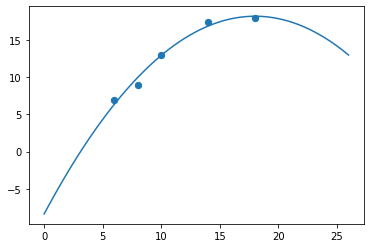

In [44]:
# 绘制训练数据的散点图
plt_obj.scatter(X_train, y_train, s=40)
# 绘制多项式(二次)回归特征
plt.plot(xx_poly, yy_poly, label='quadratic equation')

#### 1.8 绘制二次多项式和线性拟合对比图像

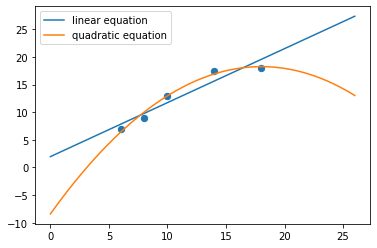

In [45]:
# 绘制训练数据的散点图
plt_obj.scatter(X_train, y_train, s=40)
# 绘制线性回归的预测结果曲线
plt.plot(xx, yy, label="linear equation")
# 绘制多项式(二次)回归特征
plt.plot(xx_poly, yy_poly, label='quadratic equation')
plt.legend(loc='upper left')
plt.show()

#### 1.9 对测试集进行预测

In [46]:
# 将测试集转换为多项式特征
X_test_poly_feature = poly_feature.fit_transform(X_test)
# 分别使用二次多项式回归和线性回归进行预测并输出决定系数 R2 的值
print('linear equation  r-squared', regressor.score(X_test, y_test))
print('quadratic equation r-squared', regressor_poly.score(X_test_poly_feature, y_test))

linear equation  r-squared 0.8283656795834485
quadratic equation r-squared 0.9785451046983032
